### **Semana 8: Actividad 2** - K-means

**Iván Lee Cancino - A01793491**

### **TC4029 - Ciencia y Analítica de Datos**

**Prof. María de la Paz Rico Fernández**

**Prof. Julio César Galindo López**

*09 - Noviembre - 2022*

---


---

Este notebook se basa en información de target
![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [28]:
#! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

In [29]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

Importa la base de datos

In [30]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

Exploremos los datos.

In [31]:

df.head()


,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [33]:
latlong=df[["latitude","longitude"]]

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

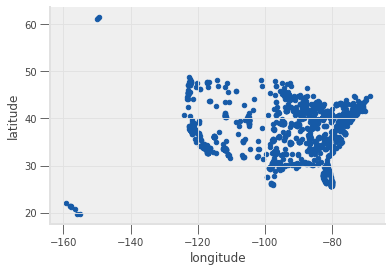

In [34]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [35]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.




In [36]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [37]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [38]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [39]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [40]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

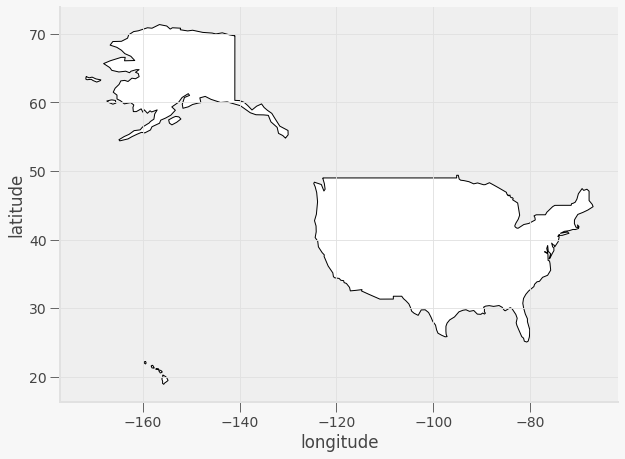

In [41]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

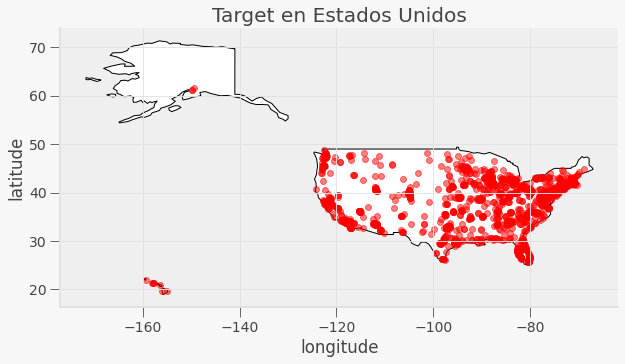

In [42]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

## **Inicio del Ejercicio**
### Encuentra el numero ideal de almacenes

In [43]:
#tu codigo aquí
from sklearn.cluster import KMeans

**Inercia**: esta métrica se define como la suma de los cuadrados de las distancias entre cada instancia y el centro de su cluster o centroide. Se busca el número de clusters que minimiza la inercia.   

Para determinar un numero de clusters óptimo podemos graficar el valor de la 'inercia' para distintos numeros de clusters. En esta gráfica buscamos el punto "codo" a partir del cual la inercia empieza a disminuír mas lento. 

In [44]:
# Iteramos desde 1 a 10 clusters
k = range(1,11)

inercia = []

for i in k:
  kmeans = KMeans(n_clusters= i, random_state= 42)
  #Entrenamos el modelo
  kmeans = kmeans.fit(latlong)
  # Calculamos la inercia
  inert = kmeans.inertia_
  inercia.append(inert)

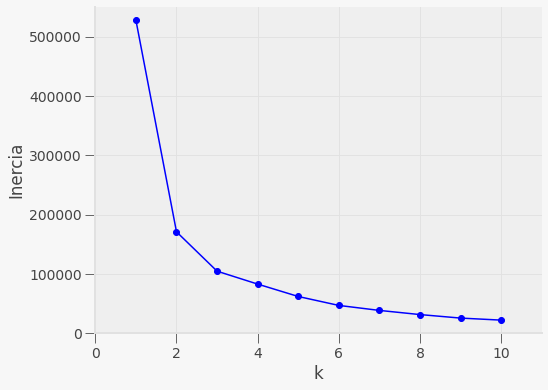

In [45]:
cluster_in = pd.DataFrame({'Cluster': k, 'Inercia': inercia})

plt.figure(figsize=(8,6))
plt.axis([0, 11, 0, 550000])
plt.xlabel('k')
plt.ylabel("Inercia")
plt.plot(cluster_in.Cluster, cluster_in.Inercia, 'bo-')


Observamos que el codo se encuentra entre el cluster 3 y 4, aunque pudiesemos considerar tambien el 5 como adecuado, debido a la cantidad de tiendas.

Otra métrica es la de **Silohuette score**, esta va de -1 a 1 donde 1 indica que la instancia está dentro de su cluster y alejada del resto, 0 indica cercanía con el limite entre clusters y -1 indica que probablemente la instancia está asignada a un cluster erróneo.  

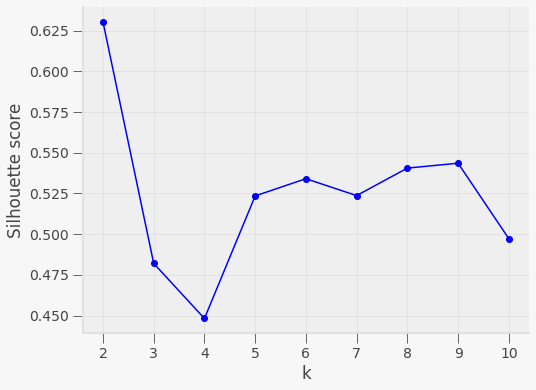

In [46]:
from sklearn.metrics import silhouette_score

# Inicializamos a partir del cluster 2
r = range(2,11)

silscore = []

for i in r:
  labels=KMeans(n_clusters=i, random_state=42).fit(latlong).labels_
  # Calculamos el score
  sil = silhouette_score(latlong, labels, random_state=42)
  silscore.append(sil) 

silscore_df = pd.DataFrame({'K':['2', '3', '4', '5', '6', '7','8','9','10'], 
                            'score': silscore
                           })

# graficamos
plt.figure(figsize=(8,6))
plt.xlabel('k')
plt.ylabel("Silhouette score")
plt.plot(silscore_df['K'], silscore_df['score'], 'bo-')

Observamos que el score para 2 clusters es el mejor, de ahí disminuye y posteriormente vemos que para 5 clusters nuevamente mejora. 

De acuerdo a lo anterior parece razonable elegir 5 clusters para cubrir todo el territorio y tomando en cuenta que hay un total de 1839 tiendas.

### Encuentra las latitudes y longitudes de los almacenes:

In [66]:
# Seleccionamos 5 clusters para nuestro modelo
K=5
kmeans = KMeans(n_clusters= K, random_state= 42)
kmeans = kmeans.fit(latlong) 

# Obtenemos las coordenadas de los almacenes
almacen = kmeans.cluster_centers_
print('Coordenadas de los almacenes:\n', almacen)

Coordenadas de los almacenes:
 [[  40.34365502  -75.58507975]
 [  37.57977424 -119.17634307]
 [  41.7596358   -88.35497835]
 [  31.10391163  -82.93309211]
 [  34.42035677  -98.26633716]]


### ¿Qué ciudad es?

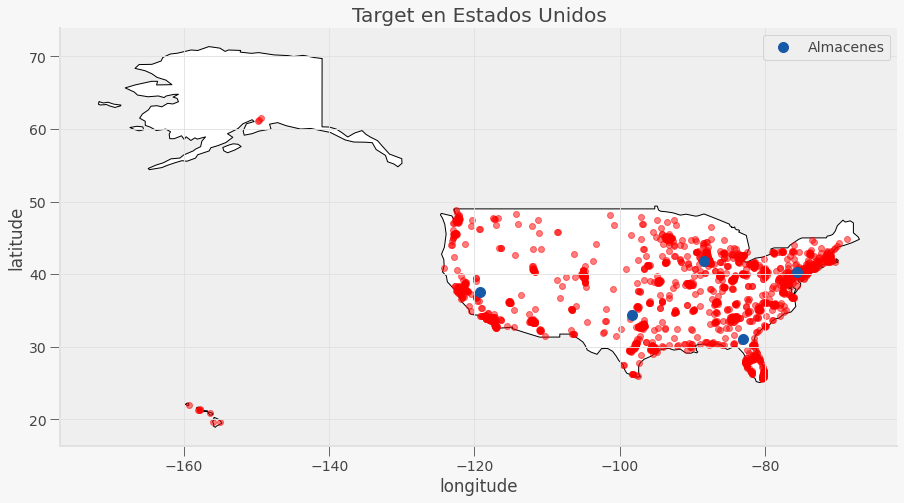

In [48]:
# Graficamos la ubicación de los almacenes
fig, gax = plt.subplots(figsize=(15,20))

world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

gdf.plot(ax=gax, color='red', alpha = 0.5)

# Agregamos los puntos en el mapa
plt.scatter(almacen[:,1], almacen[:,0], label='Almacenes', s=100) 
plt.legend(loc="upper right")

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

### Ciudades obtenidas de Google maps de acuerdo con los datos de las coordenadas: 

* **Almacen 1:**  Sassamansville, Pennsylvania | 40.34365502,  -75.58507975

* **Almacen 2:**  Mammoth Lakes, California  | 37.57977424, -119.17634307

* **Almacen 3:**  Aurora, Illinois  | 41.7596358 ,  -88.35497835

* **Almacen 4:**  Lakeland, Georgia  | 31.10391163,  -82.93309211

* **Almacen 5:**  Walters, Oklahoma. | 34.42035677,  -98.26633716

### **¿A cuantas tiendas va surtir?**

In [49]:
# Obtenemos el cluster de cada instancia
y_pred = pd.DataFrame(kmeans.fit_predict(latlong))

# hacemos conteo por cada cluster 
num_tiendas = pd.DataFrame(y_pred[0].value_counts())
num_tiendas

,0
0,480
2,422
1,368
4,296
3,273


,0,1,2,3,4
Almacen,l,2,3,4,5
Tiendas,480,368,422,273,396


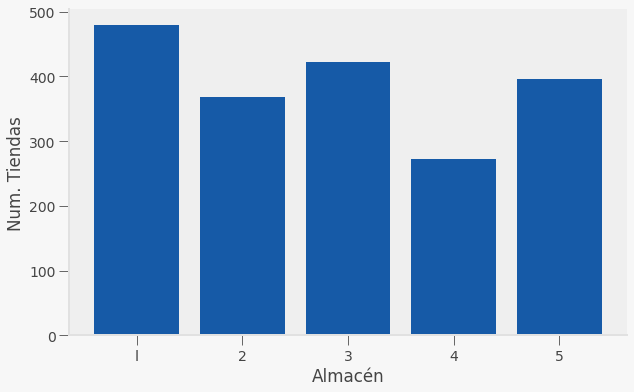

In [50]:
# Graficamos los resultados
tiendas_alm = pd.DataFrame({'Almacen':['l', '2', '3', '4', '5'], 
                         'Tiendas':[480, 368, 422, 273, 396]
                         })

plt.figure(figsize=(10,6))
plt.grid(visible=False)
plt.bar(tiendas_alm['Almacen'], tiendas_alm['Tiendas'])
plt.ylabel('Num. Tiendas')
plt.xlabel('Almacén')
tiendas_alm.transpose()

En la tabla podemos observar el numero de tiendas por cada almacén.

Por ejemplo, para el ***Almacén 1*** ubicado en Pennsylvania vemos que sería el que surtirá a mas tiendas (480). En el mapa podemos ver a simple vista que precisamente en esa región se observa una gran densidad de tiendas.

* **Almacén 1:** 480 tiendas.

* **Almacén 2:** 368 tiendas.

* **Almacén 3:** 422 tiendas.

* **Almacén 4:** 273 tiendas.

* **Almacén 3:** 396 tiendas. 


### **¿Sabes a que distancia estará?**

Con la librería **GeoPy** podemos calcular la distancia geodésica entre dos puntos utilizando los datos de latitud y longitud.

In [55]:
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
from geopy import distance 

alm_1 = (almacen[0])
alm_2 = (almacen[1])
alm_3 = (almacen[2])
alm_4 = (almacen[3])
alm_5 = (almacen[4])

print('Distancia entre Almacen 1 y 4 (Pennsylvania - Georgia):', distance.distance(alm_1, alm_4))
print('Distancia entre Almacen 4 y 5 (Georgia - Oklahoma):', distance.distance(alm_4, alm_5))
print('Distancia entre Almacen 5 y 2 (Oklahoma - California):', distance.distance(alm_5, alm_2))
print('Distancia entre Almacen 2 y 3 (California - Illinois):', distance.distance(alm_2, alm_3))
print('Distancia entre Almacen 3 y 1 (Illinois - Pennsylvania):', distance.distance(alm_2, alm_3))

Distancia entre Almacen 1 y 4 (Pennsylvania - Georgia): 1220.8018494445982 km
Distancia entre Almacen 4 y 5 (Georgia - Oklahoma): 1481.4430421009959 km
Distancia entre Almacen 5 y 2 (Oklahoma - California): 1913.4454135110507 km
Distancia entre Almacen 2 y 3 (California - Illinois): 2670.2195741279575 km
Distancia entre Almacen 3 y 1 (Illinois - Pennsylvania): 2670.2195741279575 km


### **¿Cómo elegiste el número de almacenes?**

Se eligieron 5 almacenes de acuerdo con los valores obtenidos de inercias y el silhouette score. Observamos en la gráfica que la inercia disminuye rápidamente al tener entre 3 y 4 clusters. Por otro lado, vemos que 5 clusters tienen un mejor silhoutte score en comparación con 4.  

Además tomamos en cunta que tenemos un total de 1839 tiendas, ubicadas mas densamente en la región este del país. 

* Como punto a considerar en éste análisis, pudiéramos eliminar las tiendas ubicadas en Hawaii y Alaska cuyas ubicaciónes se pueden ver como "outliers". Esto seguramente cambiaría la distribución de los almacenes, así como las métricas de inercia y silhouette score. 

### **¿Qué librerías nos pueden ayudar a graficar este tipo de datos?**

Además de GeoPandas, las siguientes librerías son útilizadas para visualización y análisis de datos geo-espaciales:

* **ArcPy**: Este paquete se utiliza para análisis de datos geográficos, conversión y gestión de datos y automatizaciones con mapas. https://pro.arcgis.com/en/pro-app/latest/arcpy/get-started/what-is-arcpy-.htm

* **GeoPlot**: Esta librería contiene visualizaciones geo-espaciales fáciles de usar, se puede usar con GeoPandas. https://geopandas.org/en/stable/gallery/plotting_with_geoplot.html 

* **CartoPy**: Se utiliza para procesamiento de datos geo-espaciales para análisis y creación de mapas. https://scitools.org.uk/cartopy/docs/latest/ 

* **GeoPy**: Nos permite ubicar coordenadas de direcciones, ciudades y países utilizando geocoders. https://geopy.readthedocs.io/en/stable/# 


### **¿Consideras importante que se grafique en un mapa?, ¿por qué?**

Definitivamente graficar los datos en un mapa pone en contexto los datos, simplificando su interpretación. Lo vimos perfectamente al inicio de este ejercicio donde una vez que la gráfica de puntos se colocó sobre el mapa, ubicamos a simple vista las regiones donde existe mayor cantidad de tiendas. También identificamos fácilmente los puntos que nos parecían como outliers, correspondientes a Hawaii y Alaska.  

Además nos ayuda a tener una mejor idea de cómo pudieran estar distribuidos los almacenes o clusters.

### **Conclusión**:

Finalmente, considero que K-means como método de aprendizaje no supervisado, resulta ser bastante útil y sencillo de implementar. Algún inconveniente que pudiéramos mencionar es que se tiene que encontrar previamente el número de clusters para correr el modelo. Dependiendo de la base de datos, esto pudiera resultar no ser tan sencillo.  

_ _ _

_ _ _ 